# Gradient Boosting Machine 

Le Gradient Boosting machine est une méthode d'ensemble utilisée en apprentissage supervisée. Le principe est de construire un modèle fort en agrégeant plusieurs modèles faibles (souvent des arbres de décisions peu profonds.)

Il peut être utilisé pour la régression, la classification binaire (via une fonction de perte logistique), ou multiclasse.

L'objectif général est minimiser une fonction de perte $\mathcal{L}(y,F(x))$, où

- $y$ est la variable cible - réelle ou catégorielle
- $x\in\mathbb{R}^d$ est un vecteur de caractéristiques
- $F(x)$ est le modèle de prédiction.

## Détails de l'algorithme GBM

- Initialisation

Nous initialisons par un modèle initial constant:
$$ F_0(x) = \arg\min_\gamma \sum_{i=1}^n \mathcal{L}(y_i,\gamma)$$
Par exemple, si $\mathcal{L}$ est l'erreur quadratique $(y-\gamma)$, alors $F_0(x)$ est la moyenne des $y_i$.

- Pour chaque itération $m=1,2,\ldots,M$:

        1. Calcul du pseudo-résidu (négatif du gradient):

$$ r_{\text{im}} = - \Big[ \dfrac{\partial\mathcal{L}(y_i,F(x_i))}{\partial{}F(x_i)} \Big]_{F(x)=F_{m-1}(x)} $$ 

        2. Ajustement d'un modèle faible $h_m(x)$

L'apprenant faible (par exemple un arbre de décision) est alors ajusté pour prédire $r_\text{im}$ à partir des $x_i$.

Autrement dit, $\quad h_m(x)\sim{}r_\text{im}$

        3. Recherche du meilleur pas (coefficient)

Nous choisissons un coefficient $\gamma_m$ qui minimise la perte le lond de la direction $h_m(x)$:


$$ \gamma_m = \arg\min_\gamma \sum_{i=1}^n \mathcal{L}(y_i,F_{m-1}(x_i) + \gamma\cdot{}h_m(x_i)) $$

        4. Mise à jour du modèle

Le modèle suivant devient,

$$ F_m(x) = F_{m-1}(x) + \nu\cdot\gamma_m\cdot{}h_m(x)$$

où $\nu\in(0,1]$ est le taux d'apprentissage qui contrôle la contribution de chaque modèle.


Finalement, après $M$ itérations, nous avons,

$$F_M(x)= F_0(x) + \sum_{m=1}^M \nu\cdot\gamma_m\cdot{}h_m(x) $$


### Remarque

La qualité du modèle dépend de : $M,\,\nu$, la profondeur des arbres et la régularisation.

Accuracy: 0.8333333333333334


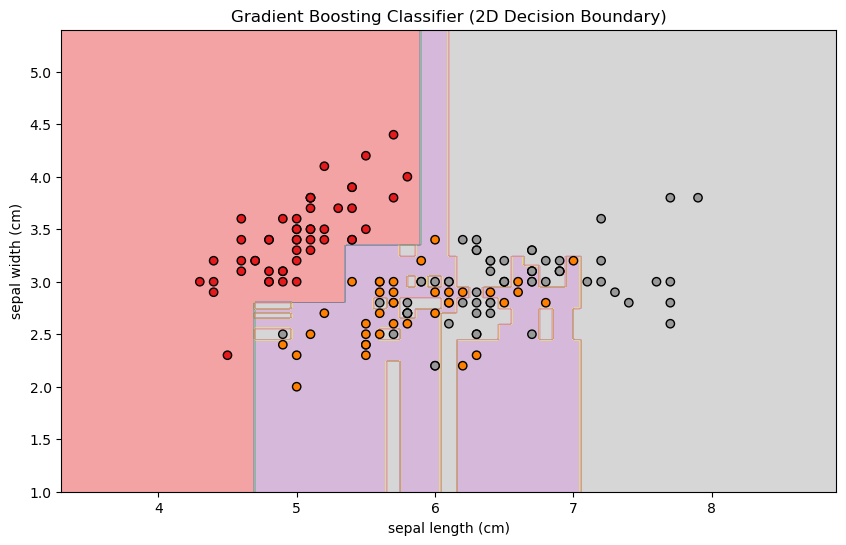

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset and select only first two features for 2D plotting
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predict and print accuracy
y_pred = gbm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = gbm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Gradient Boosting Classifier (2D Decision Boundary)")
plt.show()
